<h1> Ocular Disease - Visualisation </h1>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import matplotlib.image as mpimg
import seaborn as sns
import random as rand
from IPython.core.display import HTML

In [2]:
### CENTRE LES PLOTS ###
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [3]:
DATA_PATH = '../data/full_df.csv'
processed_img_dir = '../data/preprocessed_images/'

<h2>Propriétés du dataset: </h2>
<ul>
    <li>D = 19 colonnes </li>
    <li>X = 6392 patients </li>
    <li>Y = 8 classes </li>
</ul>

In [4]:
main_df = pd.read_csv(DATA_PATH)
print(main_df.shape)
main_df.head()

(6392, 19)


,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


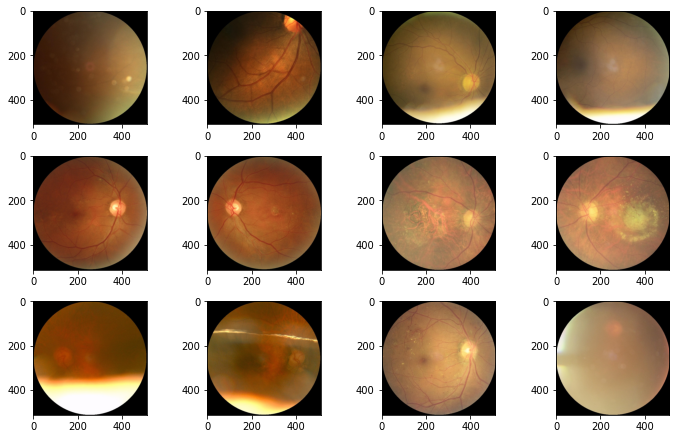

In [5]:
def afficheNYeuxPairs(n, size, dir):
    plt.rcParams["axes.grid"] = False
    fig = plt.figure(figsize=(size,size))
    images = []
    
    while (len(images) < n*2):
        random_file = rand.choice(os.listdir(dir))
        if "left" in random_file:
            random_file_alt = random_file.replace("left", "right")
        elif "right" in random_file:
            random_file_alt = random_file.replace("right", "left")
        
        if(os.path.isfile(dir + random_file_alt)):
            images.append(random_file)
            images.append(random_file_alt)
        else:
            break
    
    #print(images)
    i = 0
    for image in images:
        #print(image)
        img = mpimg.imread(os.path.join(dir, image))
        plt.subplot(int(n/2), 4, i+1) #5 colonnes max
        plt.imshow(img)
        i += 1
    plt.tight_layout()
    plt.show()

afficheNYeuxPairs(10, 10, processed_img_dir)

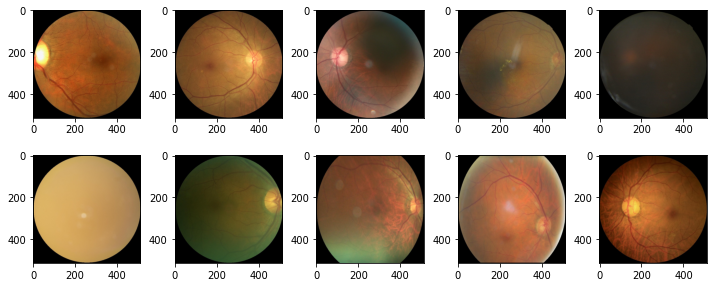

In [6]:
def afficheNYeux(n, size, dir):
    plt.rcParams["axes.grid"] = False
    fig = plt.figure(figsize=(size,size))
    
    for i in range(n):
        random_file = rand.choice(os.listdir(dir))
        img = mpimg.imread(os.path.join(dir, random_file))
        plt.subplot(int(n/2), 5, i+1) #5 colonnes max
        plt.imshow(img)
    plt.tight_layout()
    plt.show()

afficheNYeux(10, 10, processed_img_dir)

<h2> Visualisation du dataset </h2>

c:\users\ramdane\appdata\local\programs\python\python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Patient Age'}>,
        <AxesSubplot:title={'center':'N'}>],
       [<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'G'}>,
        <AxesSubplot:title={'center':'C'}>],
       [<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'M'}>],
       [<AxesSubplot:title={'center':'O'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

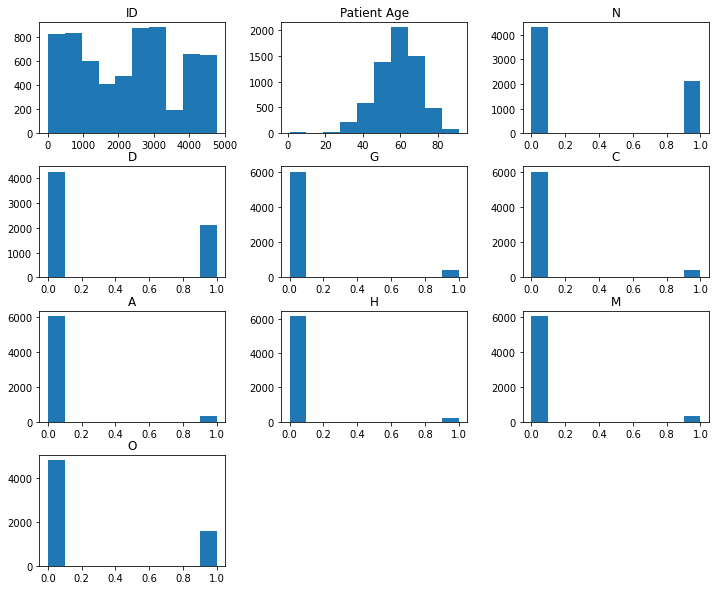

In [7]:
colonnes = ['ID', 'Patient Age', 'Patient Sex', 'Left-Fundus', 'Right-Fundus',
           'Left-Diagnostic Keywords', 'Right-Diagnostic Keywords', 'Normal', 'Diabetes', 'Glaucoma',
           'Cataract', 'Age related Macular Degeneration', 'Hypertension', 'Pathological Myopia',
            'Other diseases/abnormalities', 'filepath','labels','target','filename']

main_df.hist(bins=10, figsize=(12,10), grid=False)

<h2>Repartition des classes</h2>


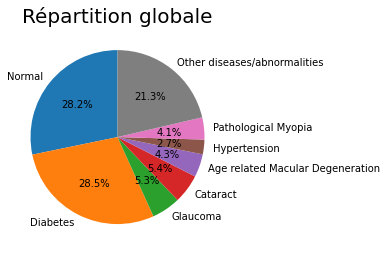

In [8]:
def visualisation_globale_classes (data,X,Y):
    #dataset= pd.read_csv(data)
    classes = main_df.iloc[:, X:Y]
    totals = classes.sum()
    
    full_labels = ['Normal', 'Diabetes', 'Glaucoma', 'Cataract', 'Age related Macular Degeneration', 
              'Hypertension', 'Pathological Myopia', 'Other diseases/abnormalities']
    
    plt.pie(totals, labels=full_labels, autopct='%1.1f%%', startangle=90)
    plt.title('Répartition globale').set_fontsize(20)
    plt.show()
    
visualisation_globale_classes(DATA_PATH,7,15)  

<b>TL;DR</b><br>
Les classes sont reparties inegalement, il faudrait faire du data augmentation sur les classes  >6%:
<ul> 
    <li> Glaucoma </li>
    <li> Cataract </li>
    <li> Age related Macular Degeneration</li>
    <li> Hypertension</li>
    <li> Pathological Myopia</li>
</ul>

<h2> Repartition des donnees en fonction de l'age </h2>

In [9]:
def Repartition_colonne(data, nom_colonne, title):
    dataset= pd.read_csv(data)
    fig, (ax1) = plt.subplots(1, 1, figsize=(15,5))
    sns.countplot(ax=ax1, x=nom_colonne, data=dataset)
    ax1.set_title(title)
    plt.show()
    
#dataset= pd.read_csv('full_df.csv').plot.scatter (x="Patient Age",y="Patient Sex")

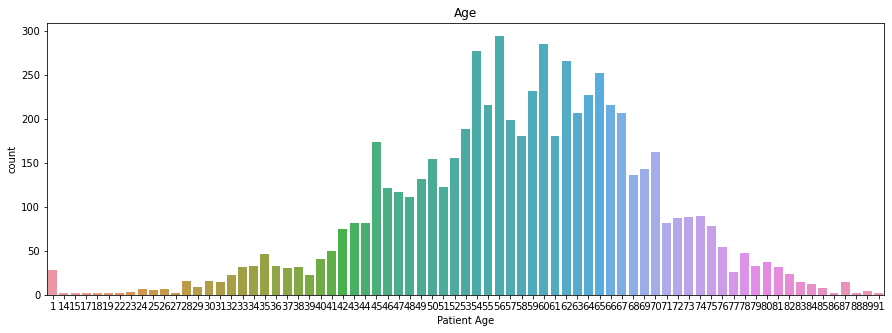

In [10]:
Repartition_colonne(DATA_PATH,"Patient Age","Age")

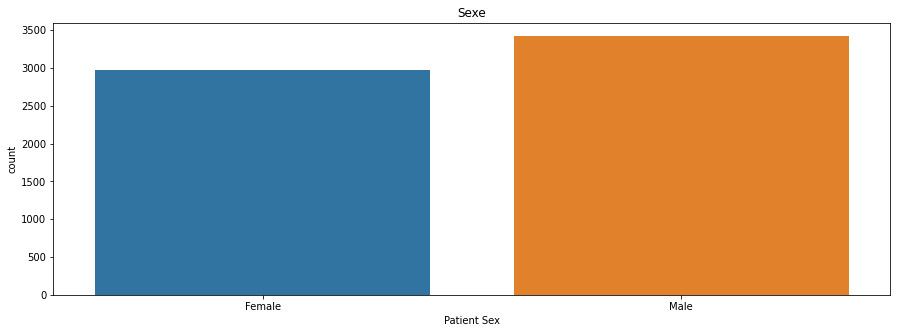

In [11]:
Repartition_colonne(DATA_PATH,"Patient Sex","Sexe")

<b>TL;DR</b><br>
Les patients on majoritairement entre 45 et 70 ansm, avec plus d'homme que de femmes.

1)Normal (N)
2)Diabetes (D)
3)Glaucoma (G)
4)Cataract (C)
5)Age related Macular Degeneration (A)
6)Hypertension (H)
7)Pathological Myopia (M)
8)Other diseases/abnormalities (O)

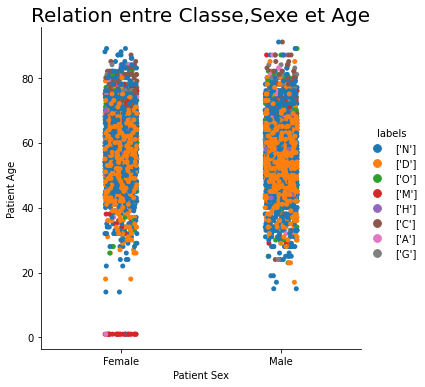

In [12]:
def relation_Colonnes(data,colonne1,colonne2,classes,title):
    dataset= pd.read_csv(data)
    sns.catplot(x=colonne1, y=colonne2, hue=classes,data=dataset)
    plt.title(title).set_fontsize(20)
    plt.show()
relation_Colonnes(DATA_PATH,"Patient Sex","Patient Age",'labels',"Relation entre Classe,Sexe et Age")

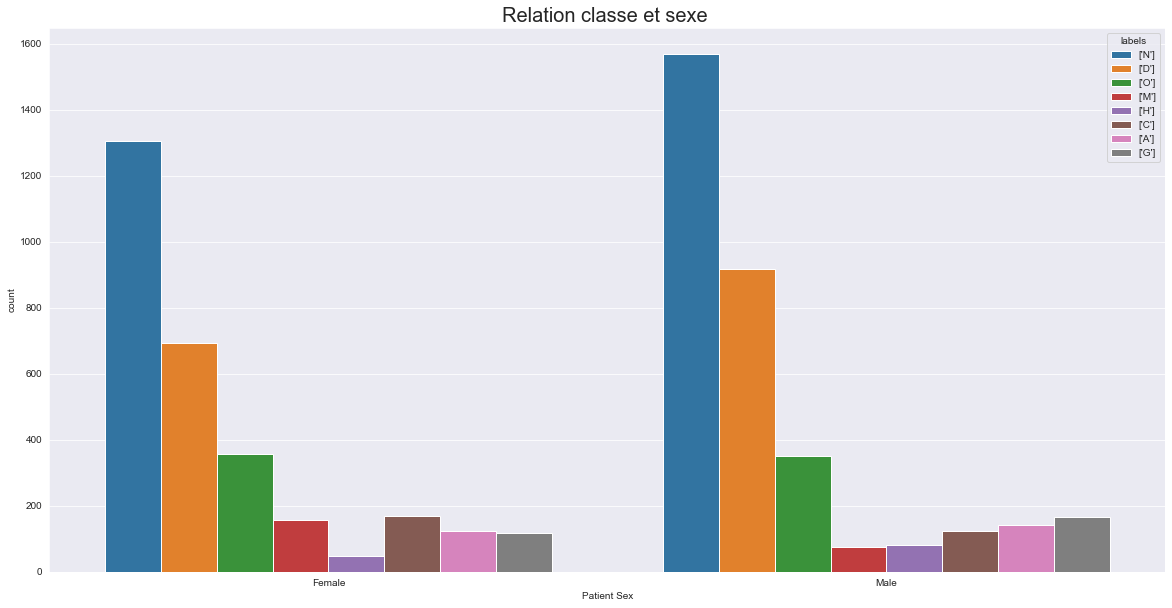

In [13]:
def relationEntre2Colonnes(data,colonne1,colonne2,title):
    dataset= pd.read_csv(data)
    sns.set_style("darkgrid")
    fig= plt.subplots(figsize=(20,10))
    sns.countplot(x=colonne1, hue=colonne2, data=dataset)
    plt.title(title).set_fontsize(20)
    plt.show()
relationEntre2Colonnes(DATA_PATH,"Patient Sex",'labels',"Relation classe et sexe ")

In [1]:
from figures import Plot
import matplotlib.pyplot as plt


label = ["alexnet_transfert",
          "resnet_transfert_DA",
          "vgg_transfert_DA",
          "squeezenet_transfert",
        ]

color= ["b","g","y","r"]


In [2]:
toPlot = []
for i in label:
    toPlot.append(Plot("rapport/csv/"+i+"/metrics.csv"))

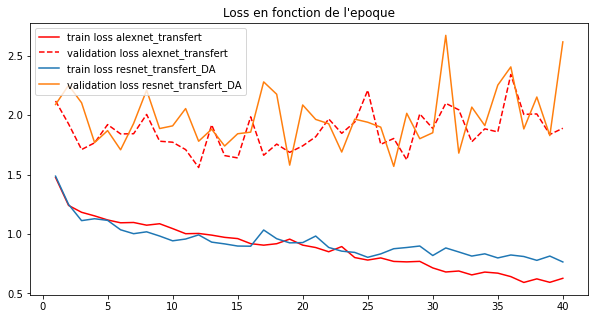

In [3]:
"""aff = Plot("rapport/csv/alexnet on prepro/metrics.csv")
aff1 = Plot("rapport/csv/alexnet on raw/metrics.csv")
aff2 = Plot("rapport/csv/alexnet_transfert/metrics.csv")
aff3 = Plot("rapport/csv/alexnet_trasnfert_DA/metrics.csv")
"""
A = toPlot[0].printLoss(getAx=True,label1=label[0], label2=label[0],color="r")
ax = toPlot[1].printLoss(ax=A,getAx=True,label1=label[1], label2=label[1])


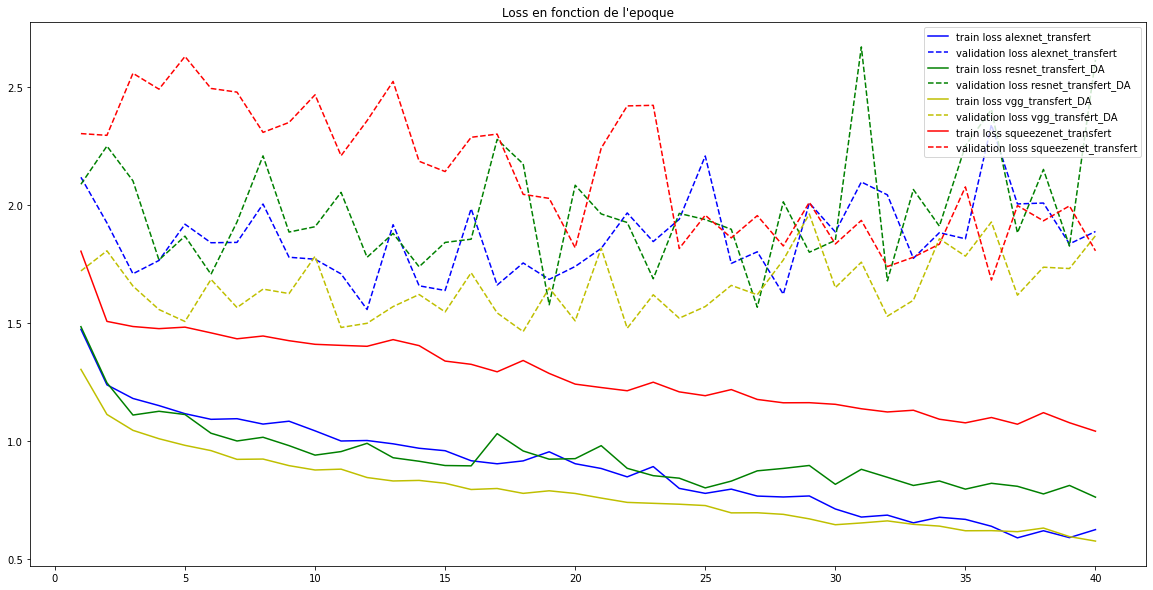

In [4]:
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(toPlot)):
    ax = toPlot[i].printLoss(ax=ax,getAx=True,label1=label[i], label2=label[i],color=color[i])

#ax = aff.printLoss(ax=ax,getAx=True,label1=" ")
#ax = aff1.printLoss(ax=ax,getAx=True)
#ax = aff2.printLoss(ax=ax,getAx=True)

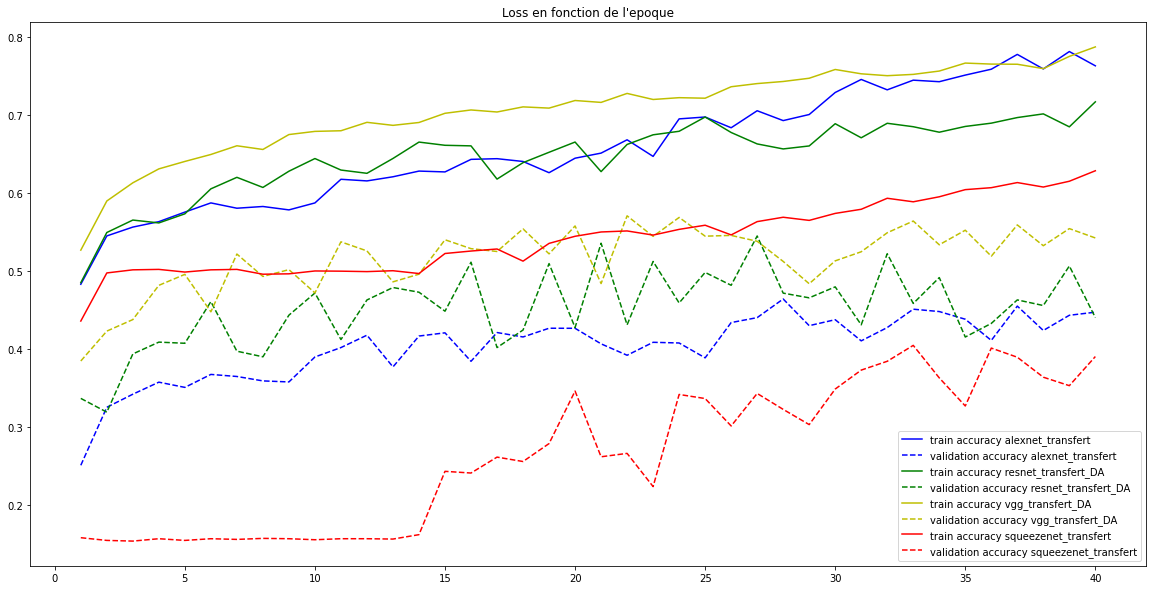

In [5]:
fig, ax = plt.subplots(figsize=(20,10))

for i in range(len(toPlot)):
    ax = toPlot[i].printAccuracy(ax=ax,getAx=True,label1=label[i], label2=label[i],color=color[i])